In [11]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier

In [12]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
#TRAIN_PATH = "../augmented_train/reformatted_train_106800_samples.csv"
TRAIN_PATH = "train_10000_samples_0_to_10_hz.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[2165.875244140625 49192.8300358057 4950.520985686926 ...
  1.0998884090695715 -0.3377874641546745 'LRDA']
 [466.188720703125 34865.269945025444 5704.912146116356 ...
  -0.6758465848267224 -0.4742115666873585 'LPD']
 [196.77908325195312 18550.839977597818 3356.709263537125 ...
  0.7214381887485093 0.5082022822209593 'GPD']
 ...
 [14016254.0 1344455.0649087245 429328.468060573 ... -2.8103673961549203
  -2.122763833527274 'Seizure']
 [726.7728271484375 68503.0798098743 6331.501753051206 ...
  1.2531196335280073 -2.844648354805996 'Seizure']
 [484.8861083984375 48225.09995627403 8512.202587755772 ...
  -0.9684973867015032 -1.878838148097688 'Other']]
(9940, 2421)


In [13]:
num_input = data_np.shape[1] - 1

x = data_np[:, 0:num_input]
y = data_np[:, num_input]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [14]:
num_neighbors = [5, 10, 15]


model = KNeighborsClassifier(n_neighbors = 5)

model.fit(x_train, y_train)

predictions_train = model.predict(x_train)
score_train = model.score(x_train, y_train)

predictions_val = model.predict(x_val)
score_val = model.score(x_val, y_val)

print('Training accuracy: {:0.5f}%  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

best_model = model

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

Training accuracy: 71.20221%  Validation accuracy: 54.63%
The test results.... 52.31%


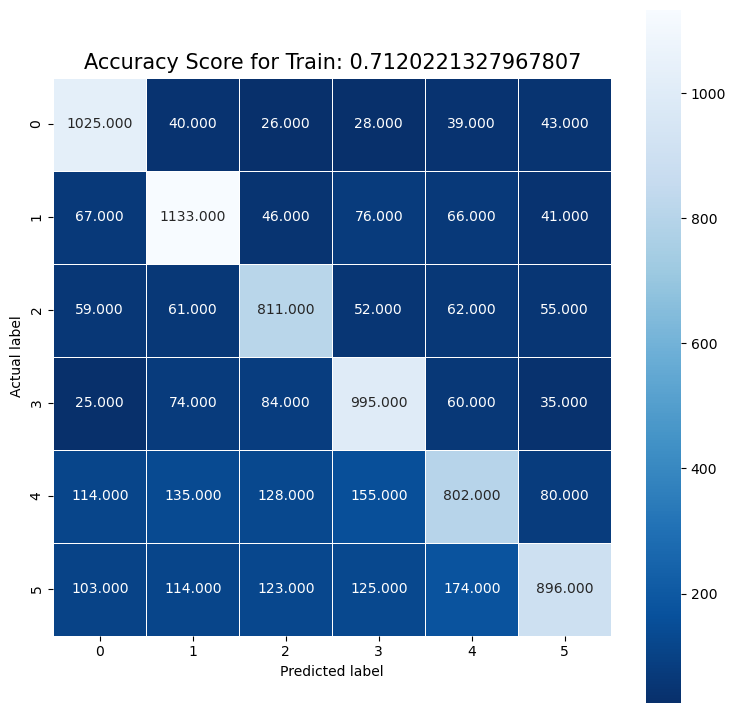

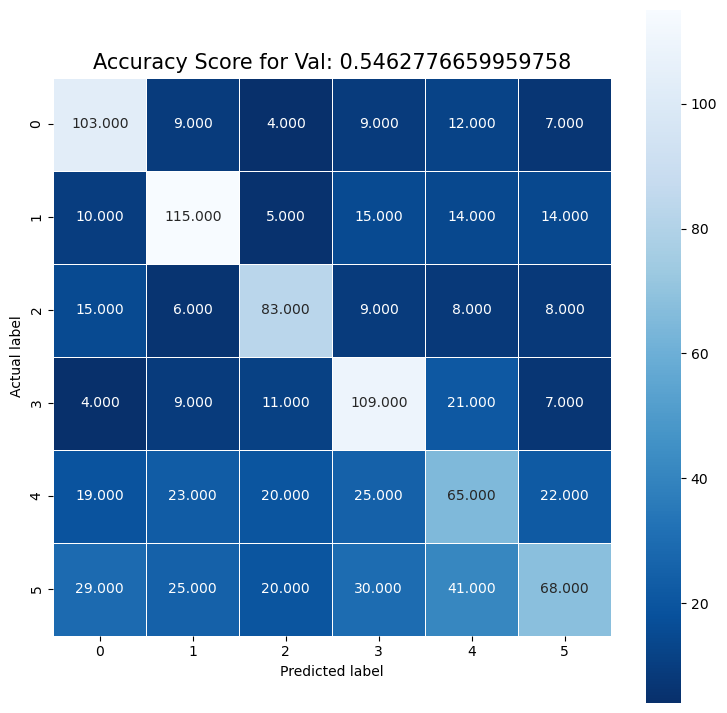

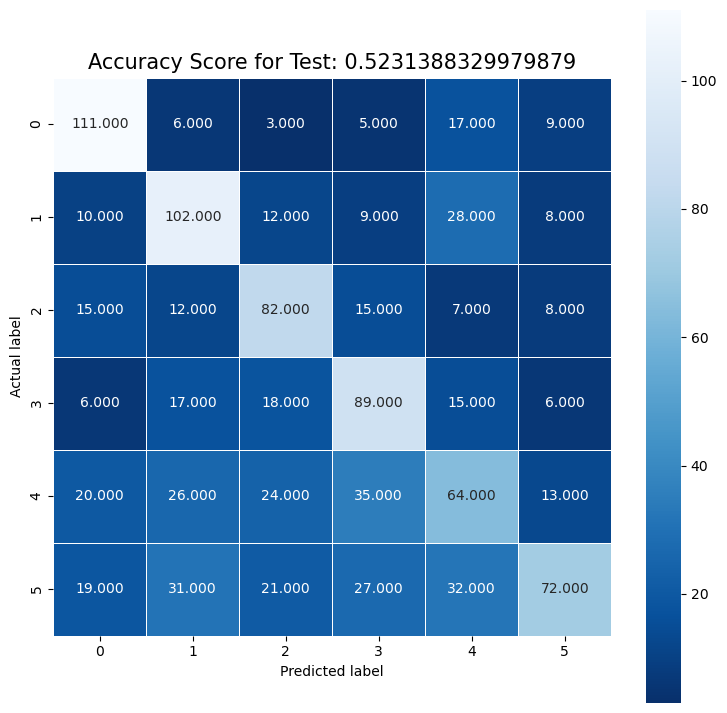

In [15]:
def confusion(predictions, actual, score, set):
    cm = skmetrics.confusion_matrix(actual, predictions)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    all_sample_title = f'Accuracy Score for {set}: {score}'
    plt.title(all_sample_title, size = 15)

confusion(best_model.predict(x_train), y_train, best_model.score(x_train, y_train), "Train")
confusion(best_model.predict(x_val), y_val, best_model.score(x_val, y_val), "Val")
confusion(best_model.predict(x_test), y_test, best_model.score(x_test, y_test), "Test")